In [1]:
import salishsea_tools
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
from salishsea_tools import geo_tools

/tmp/ipykernel_1070543/1437491431.py:4: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  dataf = xr.open_dataset(outputf)


Text(0, 0.5, 'Number of Particles Leaving Penn Cove (log)')

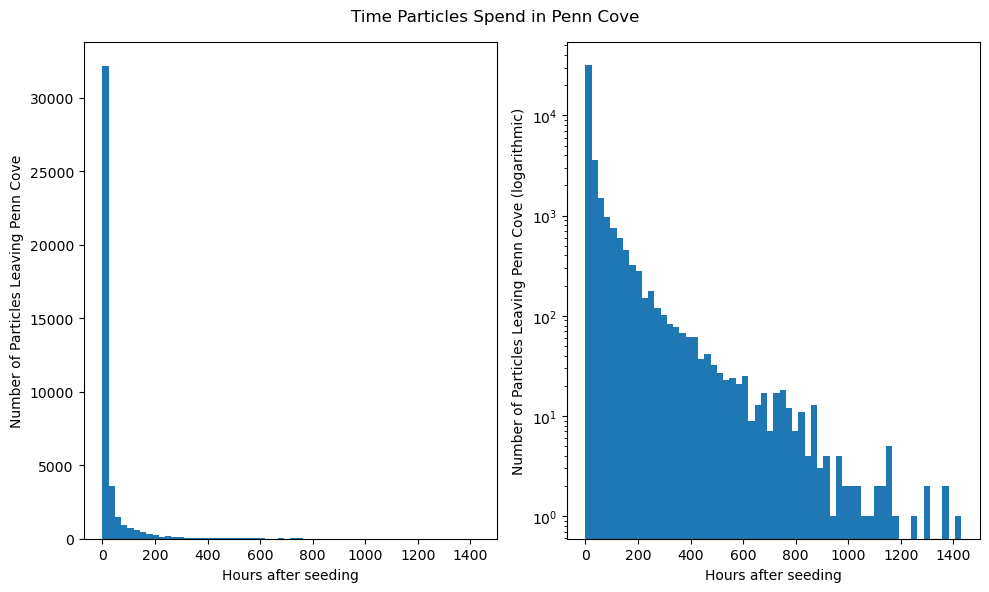

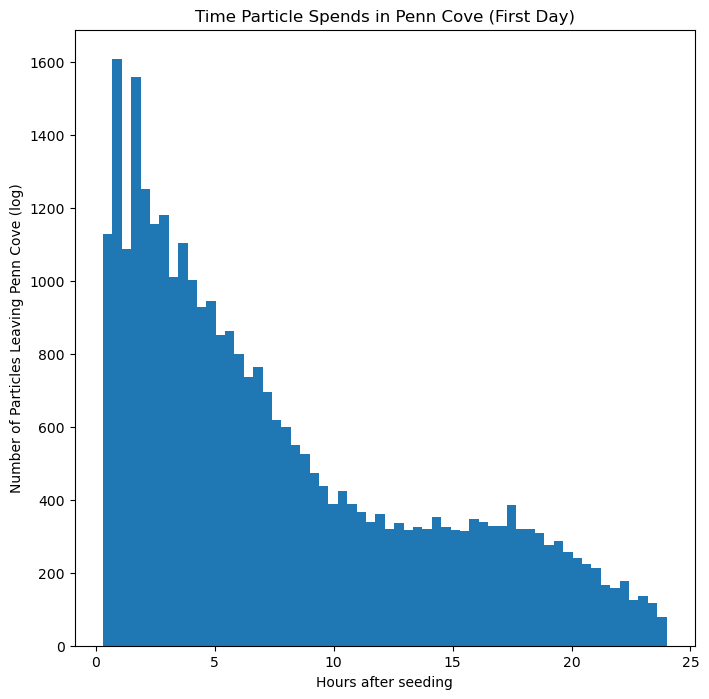

In [2]:
# Penn Cove
outputf = '/ocean/ghoeven/MOAD/analysis-griffon/Ariane/quantExPennCove/new_compw_forward_01jan18/ariane_positions_quantitative.nc'

dataf = xr.open_dataset(outputf)
fage = dataf.final_age
fage_days = fage.values / np.timedelta64(1, 'h')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax[0].hist(fage_days, bins=60, log=False, )
ax[0].set_xlabel('Hours after seeding')
ax[0].set_ylabel('Number of Particles Leaving Penn Cove')

ax[1].hist(fage_days, bins=60, log=True, )
ax[1].set_xlabel('Hours after seeding')
ax[1].set_ylabel('Number of Particles Leaving Penn Cove (logarithmic)')
fig.suptitle('Time Particles Spend in Penn Cove')
plt.tight_layout()

fage_day1 = fage_days[~(fage_days > 24)]
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(fage_day1, bins=60, log=False, )
ax.set_title('Time Particle Spends in Penn Cove (First Day)')
ax.set_xlabel('Hours after seeding')
ax.set_ylabel('Number of Particles Leaving Penn Cove (log)')

In [3]:
print('Day 1 mean time (h) = ' + str(np.mean(fage_day1)))
print('Day 1 stdev of time in (h) = ' + str(np.std(fage_day1)))
print('Total mean time in (h) = ' + str(np.mean(fage_days)))
print('Total stdev of time in (h) = ' + str(np.std(fage_days)))

Day 1 mean time (h) = 7.901303438397574
Day 1 stdev of time in (h) = 6.204463966549076
Total mean time in (h) = 33.92839193016998
Total stdev of time in (h) = 82.36731157416845


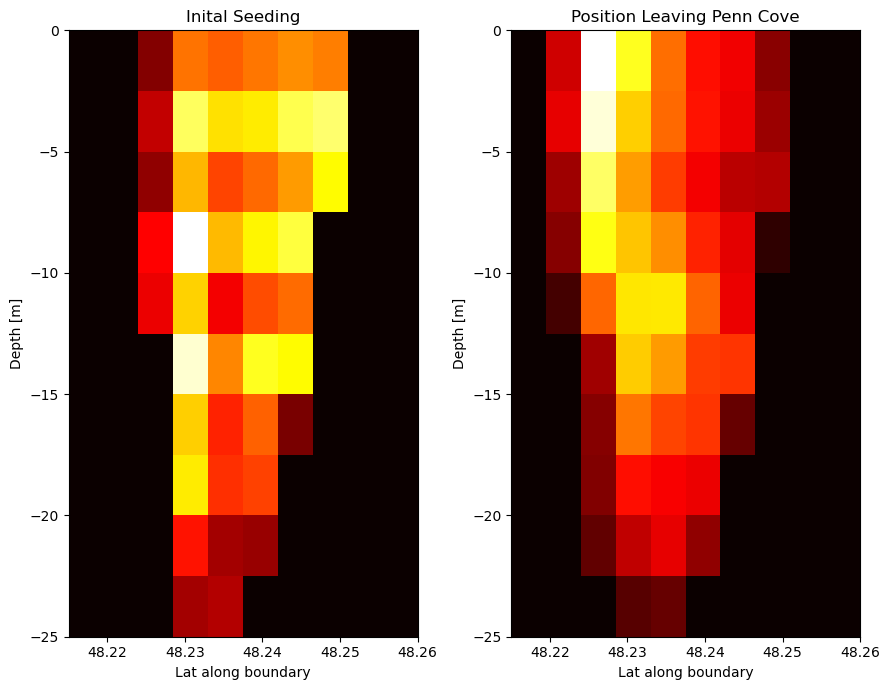

In [4]:

nc_to_plot = nc.Dataset(outputf)
mesh_nc = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

# hours = [0, 3, 6, 12, 15, 18, 21, 24]
#hours = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

variable = 'vozocrtx'
# fig, ax= plt.subplots(nrows=4, ncols=3, figsize =(12,16))
fig, ax= plt.subplots(nrows=1, ncols=2, figsize =(9,7))


igrid = 646-1
latS = 211
latN = 217
lonB = -283
k = 0

xmin, xmax, ymin, ymax = 48.215, 48.26, -25, 0

#data = nc_to_plot[variable][hour,:,latS:latN,igrid]
# X, Y = np.meshgrid(nc_to_plot['nav_lat'][lonB,latS:latN], nc_to_plot['depthu'])
# section_slice = np.arange(latS,latN)
# zlevels = mesh_nc['gdept_1d'][:][0]
# X, Y = np.meshgrid(section_slice, zlevels)
# tmesh = ax[1].pcolormesh(X,Y,data, cmap = cm.cm.balance, \
#                       vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
ax[0].set_xlim(48.215, 48.23)
ax[0].hist2d(dataf.init_lat, dataf.init_depth, bins=[10,10], range=[[xmin, xmax], [ymin, ymax]], cmap='hot')
ax[0].set_ylabel('Depth [m]')
ax[0].set_xlabel('Lat along boundary')
ax[0].set_title('Inital Seeding')

# cbar = fig.colorbar(tmesh, ax=ax[hour//6,k], orientation = 'vertical',fraction=0.08, pad=0.02)#, ticks = tticks)
# cbar.set_label(label=' U velocity [m/s]') 
ax[1].set_xlim(48.215, 48.23)
ax[1].hist2d(dataf.final_lat, dataf.final_depth, bins=[10,10], range=[[xmin, xmax], [ymin, ymax]], cmap='hot')
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Lat along boundary')
ax[1].set_title('Position Leaving Penn Cove')


plt.tight_layout()


Day 1 mean time (bottom 10m start) (h) = 8.109964674953032
Day 1 stdev of time in (bottom 10m start) (h) = 6.3070915938511
Total mean time in (bottom 10m start) (h) = 47.05256846593288
Total stdev of time (bottom 10m start) in (h) = 121.96107973100612


Day 1 mean time (bottom 10m start and end) (h) = 7.913255139185932
Day 1 stdev of time in (bottom 10m start and end) (h) = 6.191401762829467
Total mean time in (bottom 10m start and end) (h) = 19.543405531761984
Total stdev of time (bottom 10m start and end) in (h) = 50.15876316407809


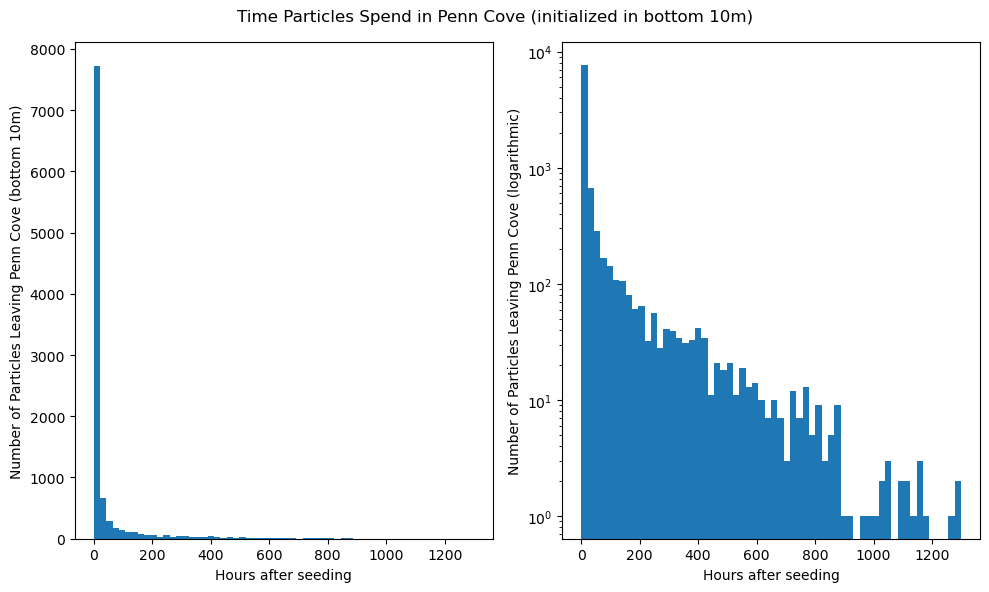

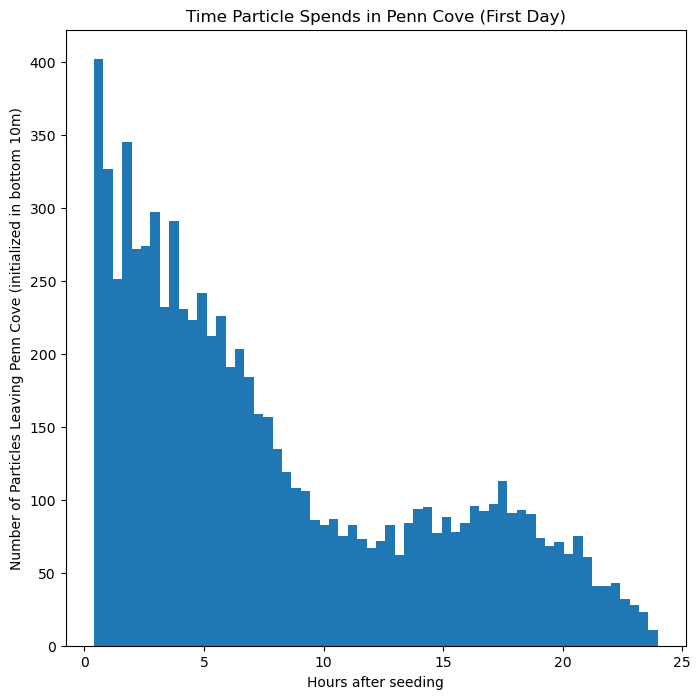

In [5]:
# Looking at residence time at low depths
mask_sd = (dataf.init_depth <= (min(dataf.init_depth) + 10))
mask_sed = (dataf.init_depth <= (min(dataf.init_depth) + 10)) & (dataf.final_depth <= (min(dataf.final_depth) + 10))

fage_low = dataf.final_age[mask_sd]
fage_days = fage_low.values / np.timedelta64(1, 'h')
fage_days_se = dataf.final_age[mask_sed].values / np.timedelta64(1, 'h')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax[0].hist(fage_days, bins=60, log=False, )
ax[0].set_xlabel('Hours after seeding')
ax[0].set_ylabel('Number of Particles Leaving Penn Cove (bottom 10m)')

ax[1].hist(fage_days, bins=60, log=True, )
ax[1].set_xlabel('Hours after seeding')
ax[1].set_ylabel('Number of Particles Leaving Penn Cove (logarithmic)')
fig.suptitle('Time Particles Spend in Penn Cove (initialized in bottom 10m)')
plt.tight_layout()

fage_day1 = fage_days[~(fage_days > 24)]
fage_day1_se = fage_days_se[~(fage_days_se > 24)]
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(fage_day1, bins=60, log=False, )
ax.set_title('Time Particle Spends in Penn Cove (First Day)')
ax.set_xlabel('Hours after seeding')
ax.set_ylabel('Number of Particles Leaving Penn Cove (initialized in bottom 10m)')

print('Day 1 mean time (bottom 10m start) (h) = ' + str(np.mean(fage_day1)))
print('Day 1 stdev of time in (bottom 10m start) (h) = ' + str(np.std(fage_day1)))
print('Total mean time in (bottom 10m start) (h) = ' + str(np.mean(fage_days)))
print('Total stdev of time (bottom 10m start) in (h) = ' + str(np.std(fage_days)))
print('\n')
print('Day 1 mean time (bottom 10m start and end) (h) = ' + str(np.mean(fage_day1_se)))
print('Day 1 stdev of time in (bottom 10m start and end) (h) = ' + str(np.std(fage_day1_se)))
print('Total mean time in (bottom 10m start and end) (h) = ' + str(np.mean(fage_days_se)))
print('Total stdev of time (bottom 10m start and end) in (h) = ' + str(np.std(fage_days_se)))

/tmp/ipykernel_1070543/2099971617.py:4: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  dataf = xr.open_dataset(outputf)


Text(0, 0.5, 'Number of Particles Leaving Holmes Harbour (log)')

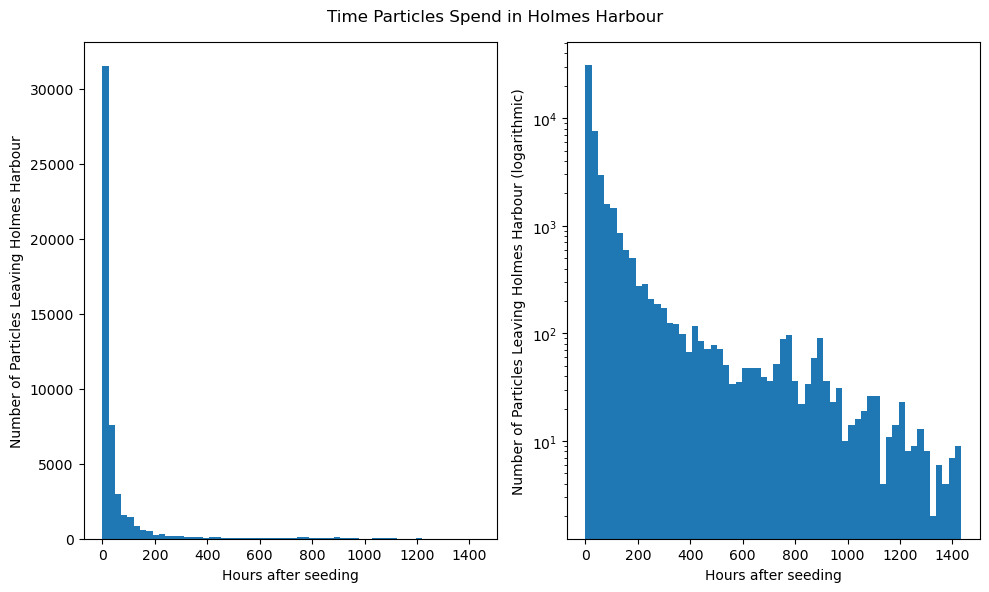

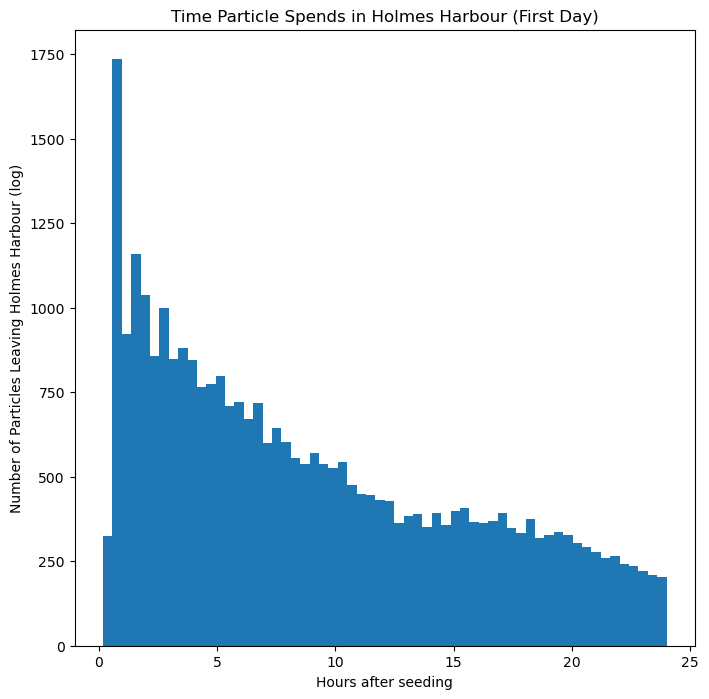

In [6]:
# Holmes Harbour
outputf = '/ocean/ghoeven/MOAD/analysis-griffon/Ariane/Holmes_QNT_30day_1/new_compw_forward_01jan18/ariane_positions_quantitative.nc'

dataf = xr.open_dataset(outputf)
fage = dataf.final_age
fage_days = fage.values / np.timedelta64(1, 'h')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax[0].hist(fage_days, bins=60, log=False, )
ax[0].set_xlabel('Hours after seeding')
ax[0].set_ylabel('Number of Particles Leaving Holmes Harbour')

ax[1].hist(fage_days, bins=60, log=True, )
ax[1].set_xlabel('Hours after seeding')
ax[1].set_ylabel('Number of Particles Leaving Holmes Harbour (logarithmic)')
fig.suptitle('Time Particles Spend in Holmes Harbour')
plt.tight_layout()

fage_day1 = fage_days[~(fage_days > 24)]
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(fage_day1, bins=60, log=False, )
ax.set_title('Time Particle Spends in Holmes Harbour (First Day)')
ax.set_xlabel('Hours after seeding')
ax.set_ylabel('Number of Particles Leaving Holmes Harbour (log)')

In [7]:
print('Day 1 mean time (h)        = ' + str(np.mean(fage_day1)))
print('Day 1 stdev of time in (h) = ' + str(np.std(fage_day1)))
print('Total mean time in (h)     = ' + str(np.mean(fage_days)))
print('Total stdev of time in (h) = ' + str(np.std(fage_days)))

Day 1 mean time (h)        = 9.042102705209292
Day 1 stdev of time in (h) = 6.561925140571487
Total mean time in (h)     = 57.15915341087254
Total stdev of time in (h) = 140.05278659300757


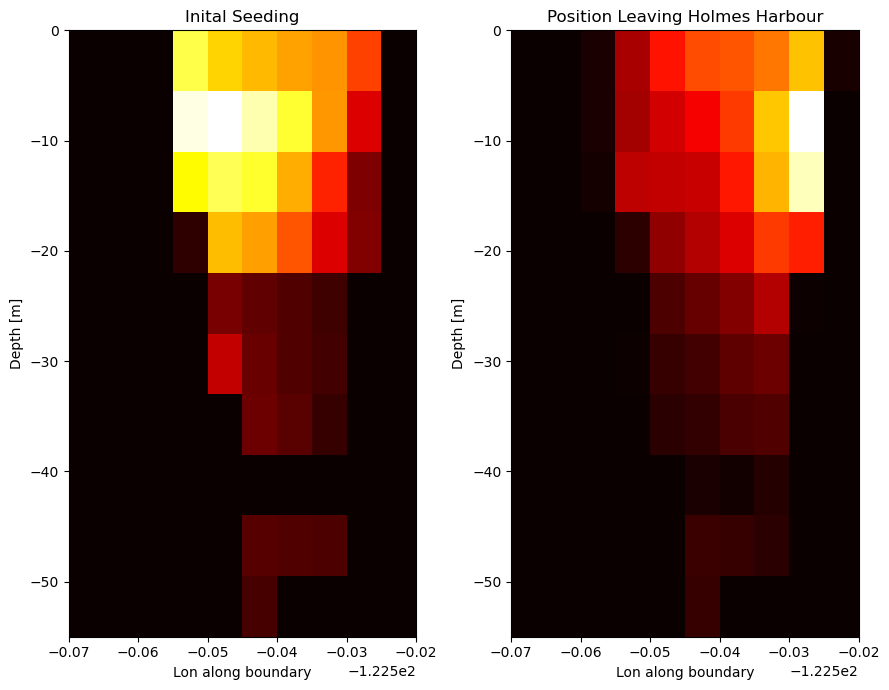

In [8]:

nc_to_plot = nc.Dataset(outputf)
mesh_nc = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

# hours = [0, 3, 6, 12, 15, 18, 21, 24]
#hours = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]

variable = 'vozocrtx'
# fig, ax= plt.subplots(nrows=4, ncols=3, figsize =(12,16))
fig, ax= plt.subplots(nrows=1, ncols=2, figsize =(9,7))


igrid = 646-1
latS = 211
latN = 217
lonB = -283
k = 0

xmin, xmax, ymin, ymax = -122.57, -122.52, -55, 0

#data = nc_to_plot[variable][hour,:,latS:latN,igrid]
# X, Y = np.meshgrid(nc_to_plot['nav_lat'][lonB,latS:latN], nc_to_plot['depthu'])
# section_slice = np.arange(latS,latN)
# zlevels = mesh_nc['gdept_1d'][:][0]
# X, Y = np.meshgrid(section_slice, zlevels)
# tmesh = ax[1].pcolormesh(X,Y,data, cmap = cm.cm.balance, \
#                       vmin = -1 * np.max(np.abs(data)), vmax = np.max(np.abs(data)))
#ax[0].set_xlim(48.215, 48.23)
ax[0].hist2d(dataf.init_lon, dataf.init_depth, bins=[10,10], range=[[xmin, xmax], [ymin, ymax]], cmap='hot')
ax[0].set_ylabel('Depth [m]')
ax[0].set_xlabel('Lon along boundary')
ax[0].set_title('Inital Seeding')

# cbar = fig.colorbar(tmesh, ax=ax[hour//6,k], orientation = 'vertical',fraction=0.08, pad=0.02)#, ticks = tticks)
# cbar.set_label(label=' U velocity [m/s]') 
#ax[1].set_xlim(48.215, 48.23)
ax[1].hist2d(dataf.final_lon, dataf.final_depth, bins=[10,10], range=[[xmin, xmax], [ymin, ymax]], cmap='hot')
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Lon along boundary')
ax[1].set_title('Position Leaving Holmes Harbour')


plt.tight_layout()


Day 1 mean time (bottom 10m start) (h) = 7.815558870763499
Day 1 stdev of time in (bottom 10m start) (h) = 6.327248491779726
Total mean time in (bottom 10m start) (h) = 40.83176099090281
Total stdev of time (bottom 10m start) in (h) = 129.63631363367844


Day 1 mean time (bottom 10m start and end) (h) = 7.593918552206769
Day 1 stdev of time in (bottom 10m start and end) (h) = 6.207369159496425
Total mean time in (bottom 10m start and end) (h) = 18.543755963994847
Total stdev of time (bottom 10m start and end) in (h) = 52.65716562413299


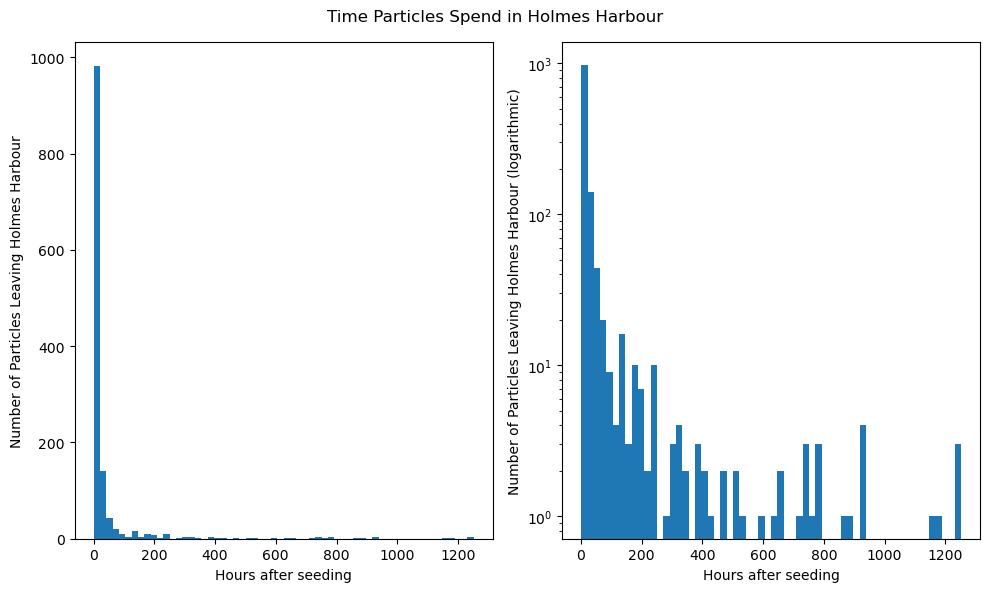

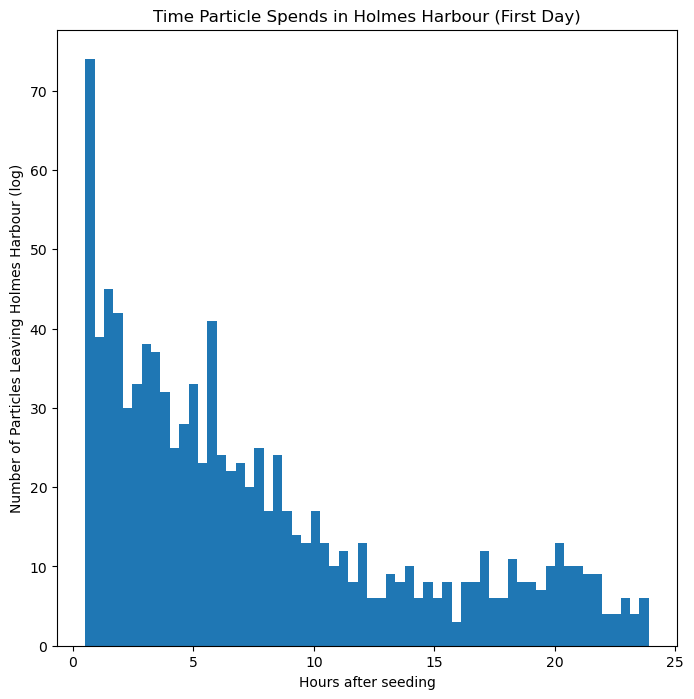

In [9]:
# Looking at residence time at low depths
mask_sd = (dataf.init_depth <= (min(dataf.init_depth) + 10))
mask_sed = (dataf.init_depth <= (min(dataf.init_depth) + 10)) & (dataf.final_depth <= (min(dataf.final_depth) + 10))

fage_low = dataf.final_age[mask_sd]
fage_days = fage_low.values / np.timedelta64(1, 'h')
fage_days_se = dataf.final_age[mask_sed].values / np.timedelta64(1, 'h')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax[0].hist(fage_days, bins=60, log=False, )
ax[0].set_xlabel('Hours after seeding')
ax[0].set_ylabel('Number of Particles Leaving Holmes Harbour')

ax[1].hist(fage_days, bins=60, log=True, )
ax[1].set_xlabel('Hours after seeding')
ax[1].set_ylabel('Number of Particles Leaving Holmes Harbour (logarithmic)')
fig.suptitle('Time Particles Spend in Holmes Harbour')
plt.tight_layout()

fage_day1 = fage_days[~(fage_days > 24)]
fage_day1_se = fage_days_se[~(fage_days_se > 24)]
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(fage_day1, bins=60, log=False, )
ax.set_title('Time Particle Spends in Holmes Harbour (First Day)')
ax.set_xlabel('Hours after seeding')
ax.set_ylabel('Number of Particles Leaving Holmes Harbour (log)')

print('Day 1 mean time (bottom 10m start) (h) = ' + str(np.mean(fage_day1)))
print('Day 1 stdev of time in (bottom 10m start) (h) = ' + str(np.std(fage_day1)))
print('Total mean time in (bottom 10m start) (h) = ' + str(np.mean(fage_days)))
print('Total stdev of time (bottom 10m start) in (h) = ' + str(np.std(fage_days)))
print('\n')
print('Day 1 mean time (bottom 10m start and end) (h) = ' + str(np.mean(fage_day1_se)))
print('Day 1 stdev of time in (bottom 10m start and end) (h) = ' + str(np.std(fage_day1_se)))
print('Total mean time in (bottom 10m start and end) (h) = ' + str(np.mean(fage_days_se)))
print('Total stdev of time (bottom 10m start and end) in (h) = ' + str(np.std(fage_days_se)))

/tmp/ipykernel_1070543/1199969365.py:4: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  dataf = xr.open_dataset(outputf)


Text(0, 0.5, 'Number of Particles Leaving Lynch Cove (log)')

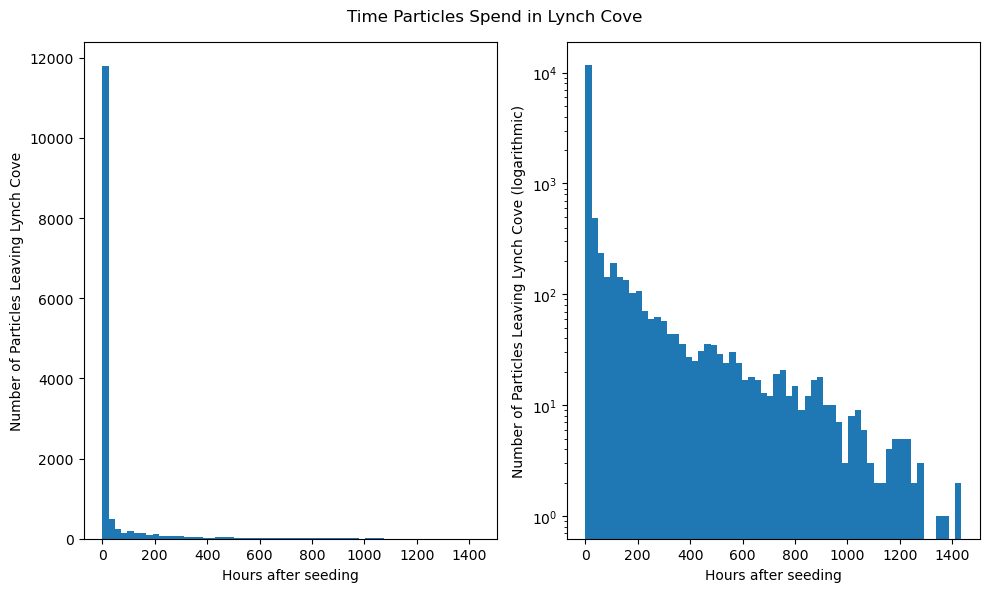

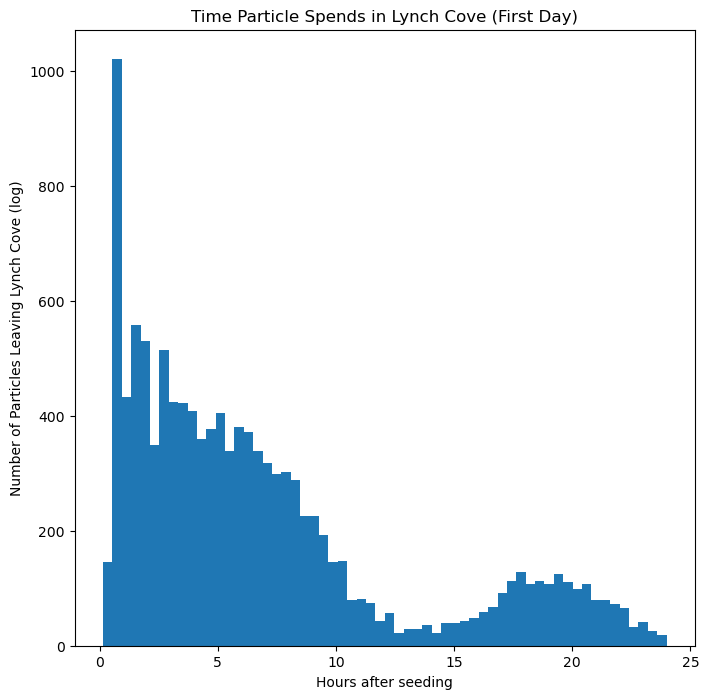

In [10]:
# Lynch Cove
outputf = '/ocean/ghoeven/MOAD/analysis-griffon/Ariane/LynchCove_30d/new_compw_forward_01jan18/ariane_positions_quantitative.nc'

dataf = xr.open_dataset(outputf)
fage = dataf.final_age
fage_days = fage.values / np.timedelta64(1, 'h')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax[0].hist(fage_days, bins=60, log=False, )
ax[0].set_xlabel('Hours after seeding')
ax[0].set_ylabel('Number of Particles Leaving Lynch Cove')

ax[1].hist(fage_days, bins=60, log=True, )
ax[1].set_xlabel('Hours after seeding')
ax[1].set_ylabel('Number of Particles Leaving Lynch Cove (logarithmic)')
fig.suptitle('Time Particles Spend in Lynch Cove')
plt.tight_layout()

fage_day1 = fage_days[~(fage_days > 24)]
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(fage_day1, bins=60, log=False, )
ax.set_title('Time Particle Spends in Lynch Cove (First Day)')
ax.set_xlabel('Hours after seeding')
ax.set_ylabel('Number of Particles Leaving Lynch Cove (log)')

In [11]:
print('Day 1 mean time (h)        = ' + str(np.mean(fage_day1)))
print('Day 1 stdev of time in (h) = ' + str(np.std(fage_day1)))
print('Total mean time in (h)     = ' + str(np.mean(fage_days)))
print('Total stdev of time in (h) = ' + str(np.std(fage_days)))

Day 1 mean time (h)        = 6.958681774700818
Day 1 stdev of time in (h) = 5.981559982130845
Total mean time in (h)     = 49.74471412222912
Total stdev of time in (h) = 144.50742655943355


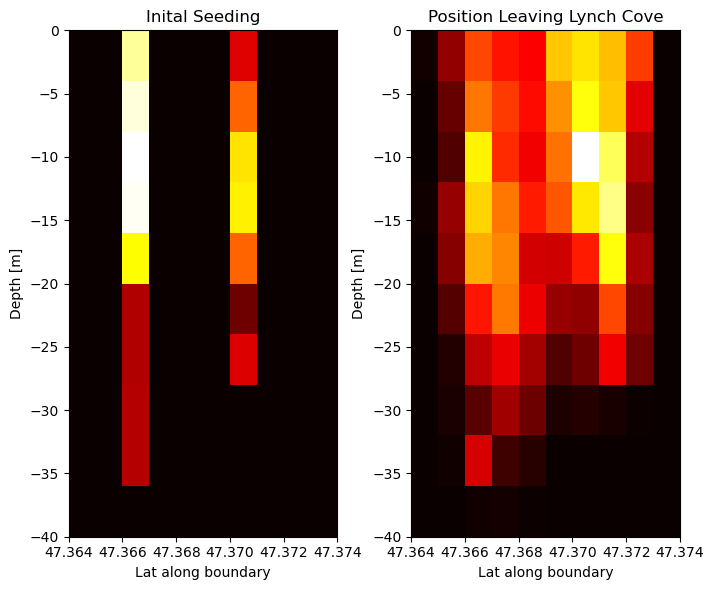

In [12]:
nc_to_plot = nc.Dataset(outputf)
mesh_nc = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

variable = 'vozocrtx'
fig, ax= plt.subplots(nrows=1, ncols=2, figsize =(7,6))

igrid = 646-1
latS = 211
latN = 217
lonB = -283
k = 0

xmin, xmax, ymin, ymax = 47.364, 47.374, -40, 0

ax[0].hist2d(dataf.init_lat, dataf.init_depth, bins=[10,10], range=[[xmin, xmax], [ymin, ymax]], cmap='hot')
ax[0].set_ylabel('Depth [m]')
ax[0].set_xlabel('Lat along boundary')
ax[0].set_title('Inital Seeding')

ax[1].hist2d(dataf.final_lat, dataf.final_depth, bins=[10,10], range=[[xmin, xmax], [ymin, ymax]], cmap='hot')
ax[1].set_ylabel('Depth [m]')
ax[1].set_xlabel('Lat along boundary')
ax[1].set_title('Position Leaving Lynch Cove')

fig.colorbar(cp, label='S-Smin (psu)')
plt.tight_layout()

Day 1 mean time (bottom 10m start) (h)        = 6.1792917303373915
Day 1 stdev of time in (bottom 10m start) (h) = 5.286696212607087
Total mean time in (bottom 10m start) (h)     = 89.15863507311953
Total stdev of time (bottom 10m start) in (h) = 200.00332155153131


Day 1 mean time (bottom 10m start and end) (h)        = 5.373573875716714
Day 1 stdev of time in (bottom 10m start and end) (h) = 4.906644194552291
Total mean time in (bottom 10m start and end) (h)     = 15.37951241855588
Total stdev of time (bottom 10m start and end) in (h) = 59.921194882289136


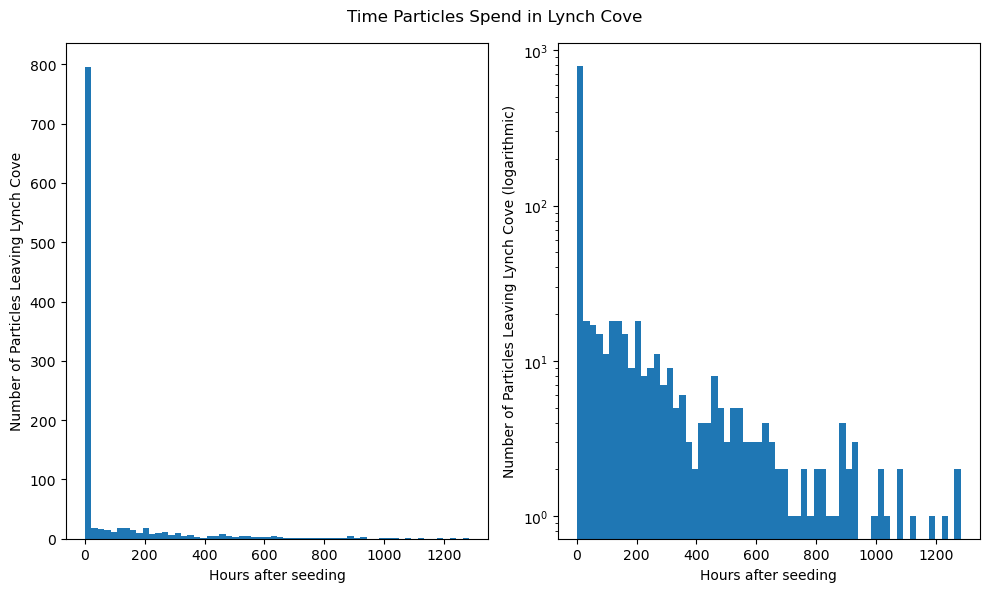

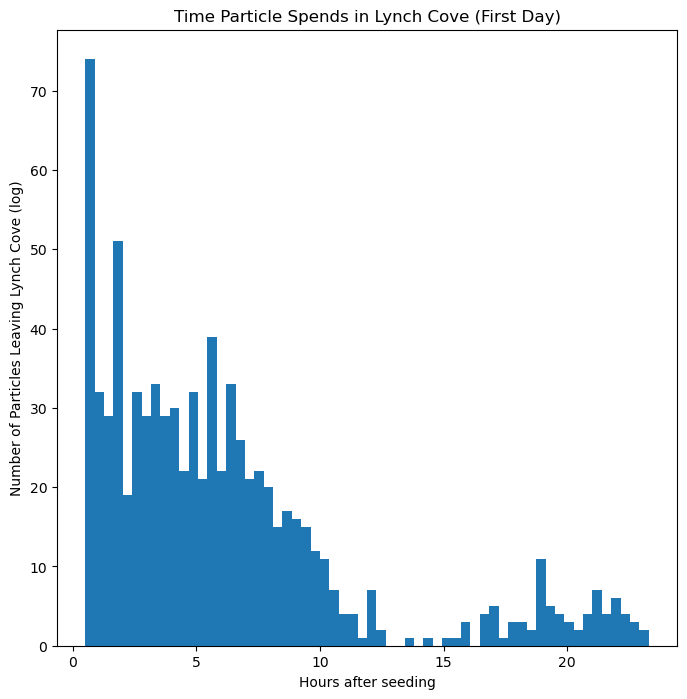

In [13]:
# Looking at residence time at low depths
mask_sd = (dataf.init_depth <= (min(dataf.init_depth) + 10))
mask_sed = (dataf.init_depth <= (min(dataf.init_depth) + 10)) & (dataf.final_depth <= (min(dataf.final_depth) + 10))

fage_low = dataf.final_age[mask_sd]
fage_days = fage_low.values / np.timedelta64(1, 'h')
fage_days_se = dataf.final_age[mask_sed].values / np.timedelta64(1, 'h')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax[0].hist(fage_days, bins=60, log=False, )
ax[0].set_xlabel('Hours after seeding')
ax[0].set_ylabel('Number of Particles Leaving Lynch Cove')

ax[1].hist(fage_days, bins=60, log=True, )
ax[1].set_xlabel('Hours after seeding')
ax[1].set_ylabel('Number of Particles Leaving Lynch Cove (logarithmic)')
fig.suptitle('Time Particles Spend in Lynch Cove')
plt.tight_layout()

fage_day1 = fage_days[~(fage_days > 24)]
fage_day1_se = fage_days_se[~(fage_days_se > 24)]
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(fage_day1, bins=60, log=False, )
ax.set_title('Time Particle Spends in Lynch Cove (First Day)')
ax.set_xlabel('Hours after seeding')
ax.set_ylabel('Number of Particles Leaving Lynch Cove (log)')

print('Day 1 mean time (bottom 10m start) (h)        = ' + str(np.mean(fage_day1)))
print('Day 1 stdev of time in (bottom 10m start) (h) = ' + str(np.std(fage_day1)))
print('Total mean time in (bottom 10m start) (h)     = ' + str(np.mean(fage_days)))
print('Total stdev of time (bottom 10m start) in (h) = ' + str(np.std(fage_days)))
print('\n')
print('Day 1 mean time (bottom 10m start and end) (h)        = ' + str(np.mean(fage_day1_se)))
print('Day 1 stdev of time in (bottom 10m start and end) (h) = ' + str(np.std(fage_day1_se)))
print('Total mean time in (bottom 10m start and end) (h)     = ' + str(np.mean(fage_days_se)))
print('Total stdev of time (bottom 10m start and end) in (h) = ' + str(np.std(fage_days_se)))